<a href="https://colab.research.google.com/github/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/blob/main/q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loaad .py module
!wget https://raw.githubusercontent.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/refs/heads/main/data_hoda.py

--2024-09-21 17:53:58--  https://raw.githubusercontent.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/refs/heads/main/data_hoda.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1084 (1.1K) [text/plain]
Saving to: ‘data_hoda.py’

data_hoda.py        100%[===================>]   1.06K  --.-KB/s    in 0s      

2024-09-21 17:53:58 (41.1 MB/s) - ‘data_hoda.py’ saved [1084/1084]



In [2]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deep-1402/refs/heads/master/images/persian-digits.jpg

--2024-09-21 17:54:55--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deep-1402/refs/heads/master/images/persian-digits.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41970 (41K) [image/jpeg]
Saving to: ‘persian-digits.jpg’

persian-digits.jpg  100%[===================>]  40.99K  --.-KB/s    in 0.01s   

2024-09-21 17:54:55 (3.47 MB/s) - ‘persian-digits.jpg’ saved [41970/41970]



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import cv2

from data_hoda import knn_classifier,load_hoda

In [17]:
x_train,y_train,x_test,y_test=load_hoda(size=19)

In [18]:
#change white & black
size=19**2

for i in range(1000):
  for j in range(size):
    x_train[i][j]=255-x_train[i][j]

for i in range(200):
  for j in range(size):
    x_test[i][j]=255-x_test[i][j]

In [19]:
#test this change:) and fit model

neigh=KNeighborsClassifier(n_neighbors=3)
print(knn_classifier(3,x_train,y_train,x_test,y_test))

0.965


array([[201, 201, 201, ..., 178, 177, 177],
       [201, 201, 201, ..., 178, 178, 177],
       [202, 202, 202, ..., 179, 178, 178],
       ...,
       [146, 146, 146, ..., 188, 187, 186],
       [145, 146, 145, ..., 188, 187, 186],
       [144, 145, 145, ..., 187, 187, 186]], dtype=uint8)
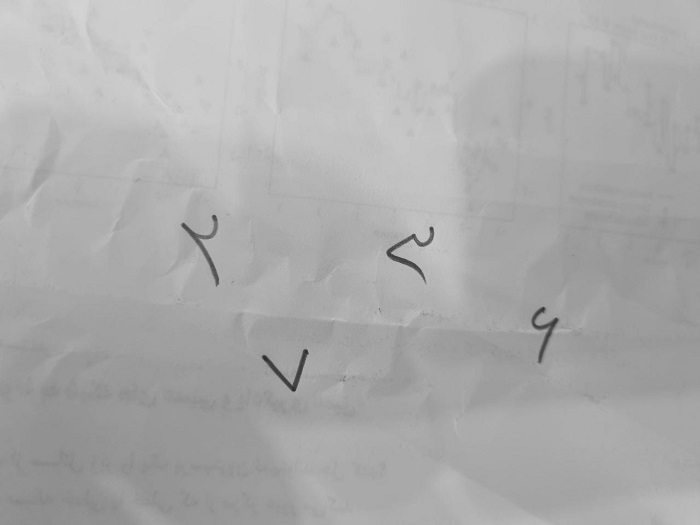

In [36]:
image = cv2.imread('persian-digits.jpg', cv2.IMREAD_GRAYSCALE)
image

In [42]:
binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

In [43]:
for x in binary_image:
  x=255-x

In [47]:
binary_image

(128.0,
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [51]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithAlgorithm(binary_image)
# Iterate through each connected component
for label in range(1, num_labels):
    # Get the bounding box of the current connected component
    x, y, w, h = stats[label][:4]
    # Crop the connected component using the bounding box
    connected_component = image[y:y+h, x:x+w]

    # Display or save the cropped connected component
    cv2.imshow(f'Cropped Component {label}', connected_component)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'connectedComponentsWithAlgorithm'
> Overload resolution failed:
>  - connectedComponentsWithAlgorithm() missing required argument 'connectivity' (pos 2)
>  - connectedComponentsWithAlgorithm() missing required argument 'connectivity' (pos 2)
